### Numeric data

In [71]:
import os
cwd=os.getcwd()
print(cwd)

/Users/macbookpro/Desktop/DSDM/Brush ups/brushup_files


In [1]:
print('hello world')

hello world


In [1]:
import pandas as pd

In [3]:
WB_data=pd.read_csv('/Users/macbookpro/Desktop/DSDM/Brush ups/brushup_files/WB_pop_clean.csv')

#4th Task

In [74]:
WB_data.head()
WB_data.tail()
WB_data.sample()

,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023
183,"Population, total",SP.POP.TOTL,St. Martin (French part),MAF,30387,31160,31929,36350,36026,35639,31948,31791,32077


In [86]:
WB_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Series Name   218 non-null    object
 1   Series Code   218 non-null    object
 2   Country Name  218 non-null    object
 3   Country Code  218 non-null    object
 4   2001          218 non-null    int64 
 5   2002          218 non-null    int64 
 6   2003          218 non-null    int64 
 7   2011          218 non-null    int64 
 8   2012          218 non-null    int64 
 9   2013          218 non-null    int64 
 10  2021          218 non-null    int64 
 11  2022          218 non-null    int64 
 12  2023          218 non-null    int64 
dtypes: int64(9), object(4)
memory usage: 22.3+ KB


In [75]:
WB_data['Country Code']


0      AFG
1      ALB
2      DZA
3      ASM
4      AND
      ... 
213    PSE
214    YEM
215    ZMB
216    ZWE
217    WLD
Name: Country Code, Length: 218, dtype: object

In [31]:
WB_DF=pd.DataFrame(WB_data)
CHECKING_NAS=WB_DF['Country Code'].isnull().sum()
print(CHECKING_NAS)

0


In [76]:
WB_data.value_counts()

Series Name        Series Code  Country Name   Country Code  2001       2002       2003       2011       2012       2013       2021       2022       2023     
Population, total  SP.POP.TOTL  Afghanistan    AFG           19688632   21000256   22645130   29249157   30466479   31541209   40099462   41128771   42239854     1
                                Pakistan       PAK           159217727  163262807  166876680  198602738  202205861  205337562  231402117  235824862  240485658    1
                                Nepal          NPL           24956071   25332178   25682908   27266399   27330694   27381555   30034989   30547580   30896590     1
                                Netherlands    NLD           16046180   16148929   16225302   16693074   16754962   16804432   17533044   17700982   17879488     1
                                New Caledonia  NCL           217324     221490     225296     254350     259000     263650     270390     269215     267940       1
                     

5th Task

In [15]:
max_values_all=WB_DF.max(numeric_only=True)
min_values_all=WB_DF.min(numeric_only=True)
print(max_values_all)
print(min_values_all)

2001    6226487141
2002    6308284566
2003    6389592840
2011    7053988749
2012    7141430933
2013    7229458453
2021    7888963821
2022    7951595433
2023    8024997028
dtype: int64
2001     9621
2002     9609
2003     9668
2011    10283
2012    10444
2013    10694
2021    11204
2022    11312
2023    11396
dtype: int64


In [17]:
max_values_2023=WB_DF.loc[:,'2023'].max()
min_values_2023=WB_DF.loc[:,'2023'].min()
print(max_values_2023)
print(min_values_2023)

8024997028
11396


6th Task

In [18]:
show_only_spain_georgia=WB_DF.loc[(WB_DF['Country Name']=='Spain') | (WB_DF['Country Name']=='Georgia')]
print(show_only_spain_georgia)

           Series Name  Series Code Country Name Country Code      2001  \
72   Population, total  SP.POP.TOTL      Georgia          GEO   4014373   
179  Population, total  SP.POP.TOTL        Spain          ESP  40850412   

         2002      2003      2011      2012      2013      2021      2022  \
72    3978515   3951736   3756441   3728874   3717668   3708610   3712502   
179  41431558  42187645  46742697  46773055  46620045  47415794  47778340   

         2023  
72    3760365  
179  48373336  


Additional Task - Histogram

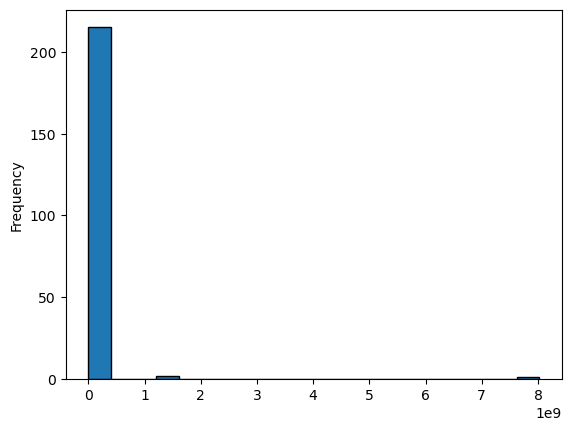

In [33]:
histogram_2023=WB_DF['2023'].plot(kind='hist', bins=20, edgecolor='black')

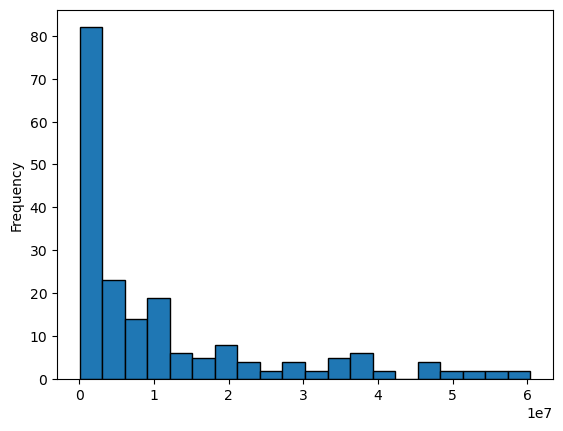

In [50]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = WB_DF['2023'].quantile(0.25)
Q3 = WB_DF['2023'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
wb_df_filtered = WB_DF[(WB_DF['2023'] >= lower_bound) & (WB_DF['2023'] <= upper_bound)]
histogram_2023_wo_outliers=wb_df_filtered['2023'].plot(kind='hist', bins=20, edgecolor='black')


<Axes: >

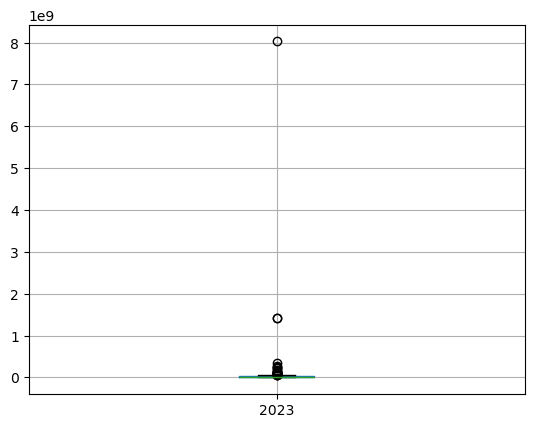

In [85]:
import matplotlib.pyplot as plt
WB_DF.boxplot('2023')

In [41]:
Q3

27061768.25

In [73]:
outlier_countries=WB_DF[(WB_DF['2023'] < lower_bound) | (WB_DF['2023'] > upper_bound)]
outlier_countries_excluded = outlier_countries[outlier_countries['Country Name'] != 'World']
print(outlier_countries_excluded)

           Series Name  Series Code        Country Name Country Code  \
15   Population, total  SP.POP.TOTL          Bangladesh          BGD   
26   Population, total  SP.POP.TOTL              Brazil          BRA   
41   Population, total  SP.POP.TOTL               China          CHN   
44   Population, total  SP.POP.TOTL    Congo, Dem. Rep.          COD   
58   Population, total  SP.POP.TOTL    Egypt, Arab Rep.          EGY   
64   Population, total  SP.POP.TOTL            Ethiopia          ETH   
68   Population, total  SP.POP.TOTL              France          FRA   
73   Population, total  SP.POP.TOTL             Germany          DEU   
89   Population, total  SP.POP.TOTL               India          IND   
90   Population, total  SP.POP.TOTL           Indonesia          IDN   
91   Population, total  SP.POP.TOTL  Iran, Islamic Rep.          IRN   
98   Population, total  SP.POP.TOTL               Japan          JPN   
127  Population, total  SP.POP.TOTL              Mexico         

In [57]:
unique_outlier_countries_count = outlier_countries.nunique()
unique_outlier_countries_count

24

### Text data

In [79]:
text_file=pd.read_csv('/Users/macbookpro/Desktop/DSDM/Brush ups/brushup_files/text_data.csv')

In [81]:
text_df=pd.DataFrame(text_file)

In [82]:
text_df.head()

,country,title,event_type
0,KHM,President Expands Control: Courts Declare Oppo...,judiciary_weakened
1,TUR,Emergency Powers Extended: Constitutional Cour...,judiciary_weakened
2,PHL,Supreme Court Backs Martial Law Extension: Cri...,judiciary_weakened
3,ZWE,High Court Deemed 'Enemy of the State': Contro...,judiciary_weakened
4,VEN,Court Overhaul Clears Path for Sweeping Econom...,judiciary_weakened
